In [2]:
from preprocessing import get_datasets
from model_helper import *
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.optimizers import AdamW

In [4]:
train_dataset, validation_dataset, test_dataset = get_datasets(32)

In [5]:
model = Sequential([
    Conv2D(32, (6, 6), activation='relu', input_shape=(69, 69, 3)),
    Conv2D(64, (5, 5), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D(pool_size=(3, 3)),
    Flatten(),
    Dense(2048, activation='relu'),
    Dense(2048, activation='relu'),
    Dense(37, activation='sigmoid')
])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        3488      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        51264     
                                                                 
 max_pooling2d (MaxPooling2  (None, 30, 30, 64)        0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 28, 28, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 14, 14, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 12, 12, 128)      

Epoch 1/50


2023-12-03 22:54:45.154771: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8902
2023-12-03 22:54:45.724504: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-12-03 22:54:46.475647: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-03 22:54:46.628848: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f678409f170 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-03 22:54:46.628905: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3090, Compute Capability 8.6
2023-12-03 22:54:46.659246: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-03 22:54:46.86299

1540/1540 [==============================] - 23s 12ms/step - loss: 0.2752 - accuracy: 0.6395 - root_mean_squared_error: 0.1365 - val_loss: 0.2560 - val_accuracy: 0.7107 - val_root_mean_squared_error: 0.1196
Epoch 2/50
1540/1540 [==============================] - 18s 12ms/step - loss: 0.2552 - accuracy: 0.7092 - root_mean_squared_error: 0.1184 - val_loss: 0.2492 - val_accuracy: 0.7294 - val_root_mean_squared_error: 0.1117
Epoch 3/50
1540/1540 [==============================] - 18s 11ms/step - loss: 0.2506 - accuracy: 0.7279 - root_mean_squared_error: 0.1125 - val_loss: 0.2463 - val_accuracy: 0.7472 - val_root_mean_squared_error: 0.1080
Epoch 4/50
1540/1540 [==============================] - 18s 12ms/step - loss: 0.2480 - accuracy: 0.7383 - root_mean_squared_error: 0.1091 - val_loss: 0.2444 - val_accuracy: 0.7575 - val_root_mean_squared_error: 0.1049
Epoch 5/50
1540/1540 [==============================] - 18s 11ms/step - loss: 0.2458 - accuracy: 0.7480 - root_mean_squared_error: 0.1060 -

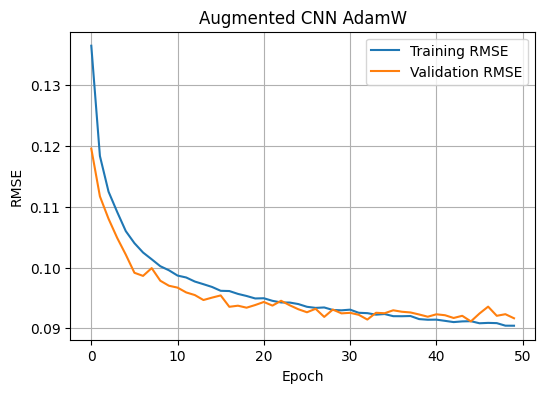

INFO:tensorflow:Assets written to: ./models/augmented_cnn_adamw/assets


INFO:tensorflow:Assets written to: ./models/augmented_cnn_adamw/assets


2500/2500 [==============================] - 8s 3ms/step


In [6]:
LEARNING_RATE = 0.001
WEIGHT_DECAY = 0.0001
optimizer = AdamW(
        learning_rate=LEARNING_RATE, weight_decay=WEIGHT_DECAY
    )

name = 'Augmented CNN AdamW'
history = compile_and_fit(model, train_dataset, validation_dataset, 50)
plot_history(history, name)
save(model, test_dataset, name)